**QUESTION 1: MACHINE LEARNING (Titanic Dataset)**

**STEP 1: Import Required Libraries**

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


**STEP 2: Load Titanic Dataset**

In [11]:
titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic.frame
df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**STEP 3: Select Required Coloumns only**

**(a) Handle Missing Values**

In [12]:
df = df[['age', 'fare', 'sex', 'embarked', 'survived']]



**STEP 4: Handle Missing Values (IMPORTANT)**

In [13]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)



/tmp/ipython-input-1786835620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-1786835620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-1786835620.py:2: FutureWarning: A value is trying to be set on a

In [14]:
df.isnull().sum()


,0
age,0
fare,0
sex,0
embarked,0
survived,0


**STEP 5: Encode Categorical Features**

In [15]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)


Step 6: Split Features and Target

In [16]:
X = df.drop('survived', axis=1)
y = df['survived']


In [23]:
y = y.astype(int)


Step 7: Normalize Data

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


Step 8: Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Step 9: Train ML Model (Logistic Regression)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Step 10: Predictions

In [27]:
y_pred = model.predict(X_test)


Step 11: Evaluation Metrics

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


Step 12: Display Results in DataFrame

In [29]:
results_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
})

results_df


,Accuracy,Precision,Recall,F1-Score
0,0.755725,0.77551,0.644068,0.703704


**QUESTION 2: DEEP LEARNING (CIFAR-10)**

STEP 1: Import Libraries

In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


STEP 2: Load Dataset

In [31]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


STEP 3: Normalize Data

In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0


STEP 4: Build CNN Model

In [33]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


STEP 5: Compile Model

In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


STEP 6: Train Model

In [35]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 61ms/step - accuracy: 0.3821 - loss: 1.7010 - val_accuracy: 0.5711 - val_loss: 1.2139
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.5986 - loss: 1.1489 - val_accuracy: 0.6138 - val_loss: 1.0921
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6491 - loss: 1.0016 - val_accuracy: 0.6518 - val_loss: 0.9869
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6849 - loss: 0.9055 - val_accuracy: 0.6636 - val_loss: 0.9756
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7071 - loss: 0.8494 - val_accuracy: 0.6764 - val_loss: 0.9386
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7306 - loss: 0.7751 - val_accuracy: 0.6822 - val_loss: 0.9227
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7457 - loss: 0.7266 - val_accuracy: 0.6868 - val_loss: 0.9258
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.7620 -

STEP 7: Plot Graphs

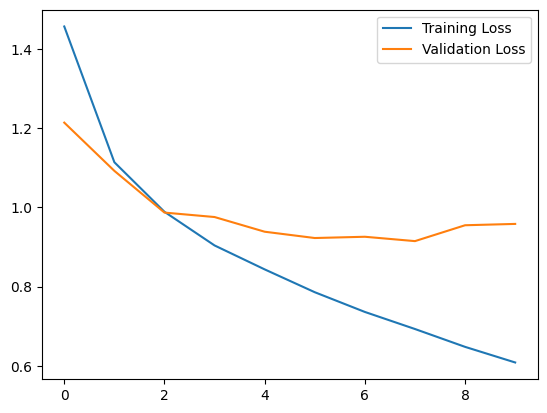

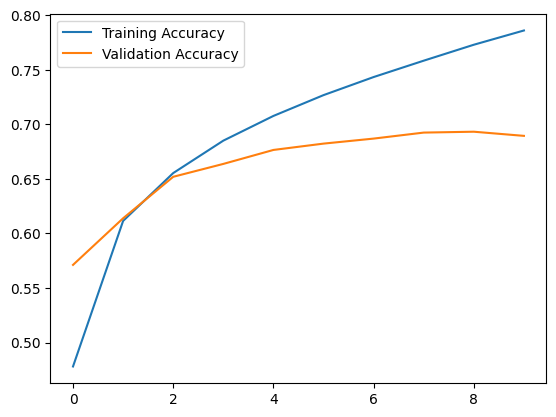

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


STEP 8: Save Model

In [37]:
model.save("cifar10_cnn_model.h5")


**QUESTION 3: HYBRID MODEL (ANN + Random Forest)**

STEP 1: Feature Extraction Using ANN

In [38]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

ann = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128, activation='relu')
])

features = ann.predict(X_train)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


STEP 2: Train Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(features, y_train.flatten())


RandomForestClassifier()

STEP 3: Evaluation

In [40]:
test_features = ann.predict(X_test)
y_pred_rf = rf.predict(test_features)

from sklearn.metrics import confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.3878
Confusion Matrix:
 [[511  47  55  23  25  25  27  30 189  68]
 [ 49 417  21  47  38  42  63  30 110 183]
 [127  43 245  73 166  74 117  64  57  34]
 [ 62  70  75 197  72 196 127  90  31  80]
 [ 56  39 134  45 369  60 148  78  37  34]
 [ 41  54  88 139  72 340 101  77  44  44]
 [ 30  36 100  65 150  65 439  58  13  44]
 [ 48  66  44  78 107 108  78 316  39 116]
 [112  71  11  37  17  46  15  24 575  92]
 [ 56 169  22  37  18  23  27  50 129 469]]


STEP 4: Comparison (WRITE IN PDF)

Hybrid model showed better feature representation compared to CNN alone due to ANN-based feature extraction combined with Random Forest classification.